# Data Exploration

This notebook will explore the breast cancer dataset preparing us for building a binary classification model

## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append("..")

from helper.functions import display_side_by_side, color_less_than_equal, color_more_than_equal, response_over_time, distribution_plots, correlation_plot

## Read Data

In [2]:
data = pd.read_csv("../data/Breast_Cancer.csv")

In [3]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## Data Shape

In [4]:
data.shape

(4024, 16)

## Data Columns

In [5]:
data.columns.to_list()

['Age',
 'Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months',
 'Status']

## Define Target Feature

In [6]:
target = "Status"

features = [col for col in data.columns.to_list() if col != target]

## Initial Analysis

### Duplicated Rows

In [7]:
dup_frame = data[data.duplicated(keep="last")]

if dup_frame.shape[0] > 0:
    print(f"Number of duplicated rows: {dup_frame.shape[0]}")

Number of duplicated rows: 1


### Check Unique Values

In [8]:
# Create data frames for the number of unique values in each column
unique_value_frame = data.nunique().to_frame(name="number of unique values")

# Compute the percentage of unique values of the column
unique_value_frame["perc of unique values over total number of rows (%)"] = round(
    unique_value_frame["number of unique values"] / data.shape[0] * 100, 2
)

# Sort them in descending order
unique_value_frame.sort_values(
    ascending=False, by="number of unique values", inplace=True
)

# Colour DataFrame columns with unique values
# 1. more than equal x percentage (green)
#2. less than equal y percentage (yellow)
unique_value_frame.style.apply(
    lambda x: color_more_than_equal(x, "perc of unique values over total number of rows (%)", 95),
    axis=1,
).apply(
    lambda x: color_less_than_equal(x, "perc of unique values over total number of rows (%)", 1),
    axis=1,
)

,number of unique values,perc of unique values over total number of rows (%)
Tumor Size,110,2.730000
Survival Months,107,2.660000
Regional Node Examined,54,1.340000
Age,40,0.990000
Reginol Node Positive,38,0.940000
Marital Status,5,0.120000
6th Stage,5,0.120000
T Stage,4,0.100000
differentiate,4,0.100000
Grade,4,0.100000


The above table may help to go someway to identify which columns need to be one hot encoded or mean response encoded - if it is a categorical feature and there are lots of unique values we would want to MRE rather than OHE. We will come back to this idea in a later cleaning notebook.

**Conclusion:**

From some features there appears to be only two values for suggesting that mapping to 0/1 would be sensible.

Other categorical values with a low number of unique values could be OHE.

Then categorical values with a high number of unique values should be MRE - otherwise we'll end up with too many new columns.

This is just a place to note down any initial observations, we will go into in depth more choosing encoding options in a later notebook.

### Datatypes

In [9]:
# A list of dataframes with each containing the data columns with the same datatype
df_grouped_datatypes = [
    grouped.index.to_frame(name=getattr(dtype, "name", str(dtype))).reset_index(drop=True)
    for dtype, grouped in data.T.groupby(data.dtypes, sort=False)
]

# The asterisk is used to unpack the list to fit into the function format
display_side_by_side(*df_grouped_datatypes)

,int64
0,Age
1,Tumor Size
2,Regional Node Examined
3,Reginol Node Positive
4,Survival Months
,str
0,Race
1,Marital Status
2,T Stage
3,N Stage


**Conclusion:**

We have 5 int columns and 11 string columns

## Target Investigation

In [10]:
data[target].value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

We would like to change this to a binary 0 and 1 value

In [11]:
# convert target to binary in-place
data['Status'] = data['Status'].map({'Alive': 1, 'Dead': 0})

# confirm transformation
print(data['Status'].value_counts())

Status
1    3408
0     616
Name: count, dtype: int64


### Distribution

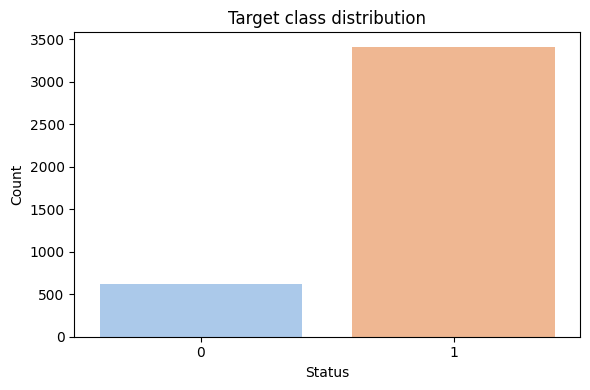

In [12]:
status_counts = data[target].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=status_counts.index, y=status_counts.values,
            hue=status_counts.index, dodge=False, legend=False,
            palette="pastel")
plt.ylabel("Count")
plt.title("Target class distribution")
plt.tight_layout()

### Target Over Time

In [13]:
print("Min date:", data["Survival Months"].min())
print("Max date:", data["Survival Months"].max())

Min date: 1
Max date: 107


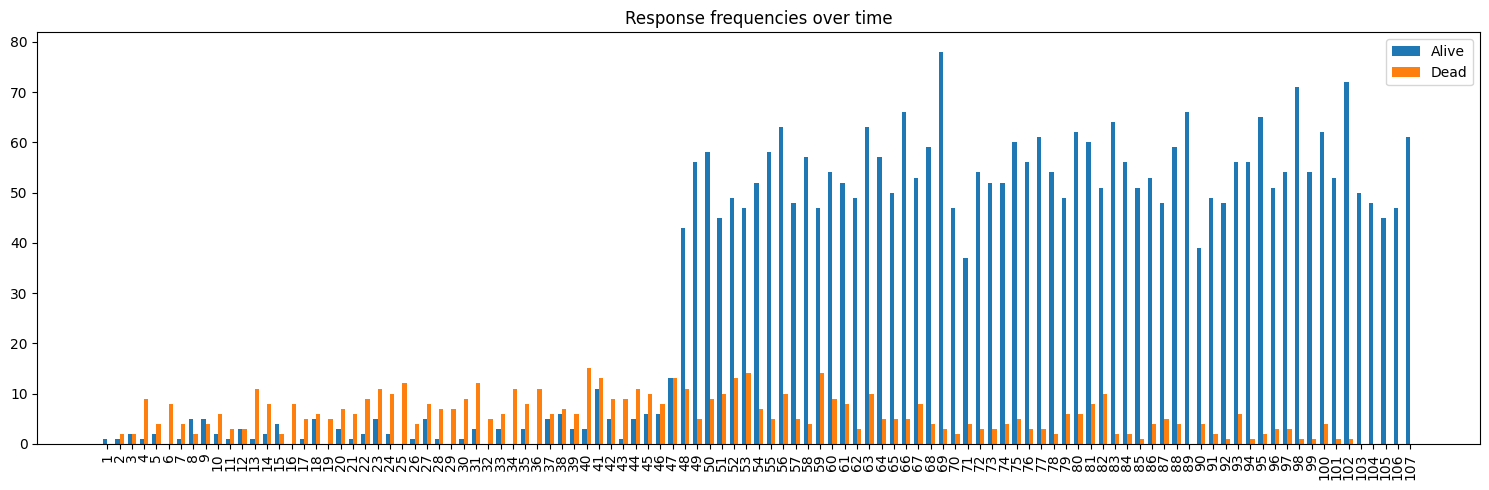

In [14]:
plot_dict = {
    "response column": "Status",
    "group by": "Survival Months",
    "response labels": {1: "Alive", 0: "Dead"},
}

response_over_time(data[[target, plot_dict["group by"]]], plot_dict)

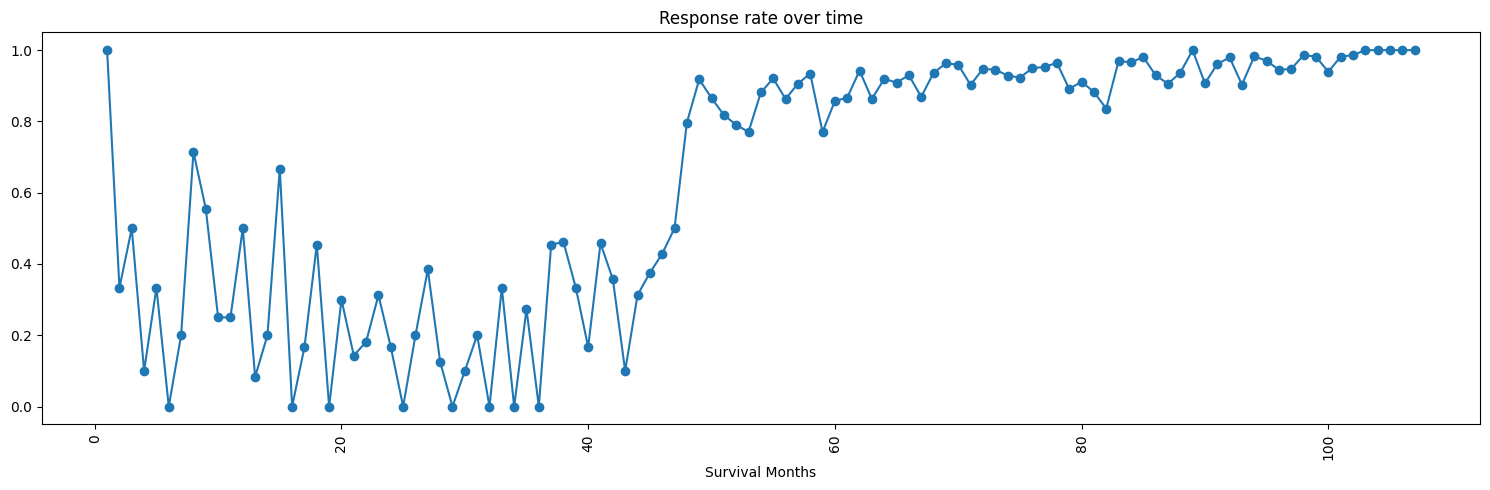

In [15]:
response_over_time(
    data[[target, plot_dict["group by"]]], plot_dict, rate_plot=True
)

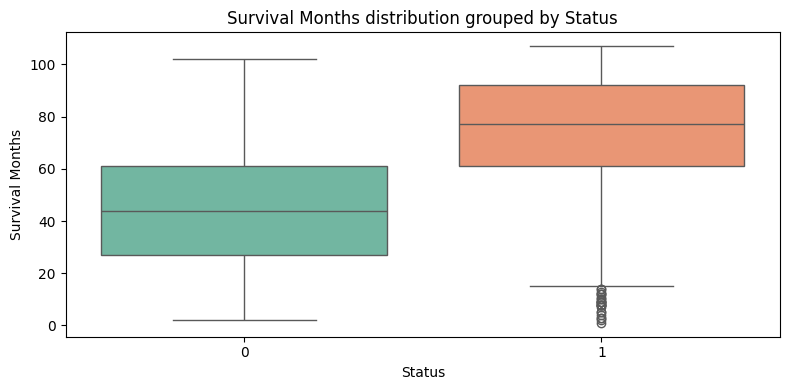

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(x=target, y="Survival Months", data=data,
            hue=data[target], palette="Set2", legend=False)
plt.title("Survival Months distribution grouped by Status")
plt.tight_layout()

**Conclusion:**

Survival Months range from 1 to 107. The frequency plot shows records are concentrated in mid-to-later months, while the response-rate plot increases over time, indicating a higher proportion of Alive at larger survival-month values.

This pattern is expected: people observed at longer survival durations are more likely to be in the Alive class.

## Feature Analysis

### Separate Feature Types

Oftentimes, the features of the data set are not in the expected dtype. Hence, more often than not, you want to manually group them into a category so that you can do type conversion and analysis them altogether.

In [17]:
col_list = sorted(data.columns)
print(col_list)

['6th Stage', 'A Stage', 'Age', 'Estrogen Status', 'Grade', 'Marital Status', 'N Stage', 'Progesterone Status', 'Race', 'Reginol Node Positive', 'Regional Node Examined', 'Status', 'Survival Months', 'T Stage ', 'Tumor Size', 'differentiate']


In [18]:
date_fields = ["Survival Months"]

numeric_fields = []

binary_fields = []

categorical_fields = []

target_fields = [target]

ignore_fields = []

In [19]:
for feature in features:
    if feature not in date_fields:
        if data[feature].nunique() == 1 or data[feature].nunique() == 2:
            binary_fields.append(feature)

        else:
            if pd.api.types.is_string_dtype(data[feature]):
                categorical_fields.append(feature)

            elif pd.api.types.is_numeric_dtype(data[feature]):
                numeric_fields.append(feature)

            else:
                categorical_fields.append(feature)

In [20]:
all_fields = (
    date_fields
    + numeric_fields
    + binary_fields
    + categorical_fields
    + target_fields
    + ignore_fields
)

print("number of data features:", data.shape[1])
print("number of features in fields:", len(all_fields))

number of data features: 16
number of features in fields: 16


**Success:** the number of features in fields is equal to the number of data features, the categories are comprehensive.

Some categoric fields will have too many values as they are actually text/ID, so we need to check and swap them over to the correct feature list.

In [21]:
for field in categorical_fields:
    if data[field].value_counts().shape[0] > 100:
        print(field)

There is no fields therefore we are okay to proceed

### Date Fields

SEER records in this dataset were diagnosed between 2006 and 2010. To replace the old numeric format directly, Survival Months is converted in-place to pandas datetime using 2006-01-01 as the anchor date.

In [22]:
# Replace old numeric format directly with pandas datetime
# Anchor date is based on the cohort diagnosis window start
diagnosis_start = pd.Timestamp("2006-01-01")

data["Survival Months"] = data["Survival Months"].apply(
    lambda months: diagnosis_start + pd.DateOffset(months=int(months))
)

# Date-field summary after in-place conversion
date_df = data[date_fields]

date_summary = pd.concat(
    [
        date_df.count().rename("Count"),
        date_df.isnull().sum().rename("Null"),
        (date_df.isnull().sum() / date_df.shape[0]).round(3).rename("% Null"),
        date_df.min().rename("Start Date"),
        date_df.max().rename("End Date"),
        (date_df.max() - date_df.min()).rename("Range"),
    ],
    axis=1,
)

date_summary

,Count,Null,% Null,Start Date,End Date,Range
Survival Months,4024,0,0.0,2006-02-01,2014-12-01,3225 days


**Conclusion:** No missing data, which is good - we do not expect to have missing values for the reported and loss dates on claims. Missing date fields are difficult to deal with and often need to be dropped.

### Numeric Fields

In [23]:
numeric_df = data[numeric_fields]

numeric_summary = pd.concat(
    [
        numeric_df.count().rename("Count"),
        numeric_df.isnull().sum().rename("Null"),
        (numeric_df.isnull().sum() / numeric_df.shape[0]).round(3).rename("% Null"),
        numeric_df.nunique().rename("Unique"),
        numeric_df.mean().round(3).rename("Mean").round(5),
        numeric_df.min().round(3).rename("Min").round(5),
        numeric_df.max().round(3).rename("Max").round(5),
        (numeric_df.max() - numeric_df.min()).round(5).rename("Range"),
        numeric_df.quantile(0.25).round(5).rename("25%"),
        numeric_df.quantile(0.50).round(5).rename("50%"),
        numeric_df.quantile(0.75).round(5).rename("75%"),
        numeric_df.var().round(5).rename("Var"),
        numeric_df.std().round(5).rename("STD"),
    ],
    axis=1,
    sort=False,
)

numeric_summary

,Count,Null,% Null,Unique,Mean,Min,Max,Range,25%,50%,75%,Var,STD
Age,4024,0,0.0,40,53.972,30,69,39,47.0,54.0,61.0,80.33778,8.96313
Tumor Size,4024,0,0.0,110,30.474,1,140,139,16.0,25.0,38.0,446.04156,21.11970
Regional Node Examined,4024,0,0.0,54,14.357,1,61,60,9.0,14.0,19.0,65.60473,8.09967
Reginol Node Positive,4024,0,0.0,38,4.158,1,46,45,1.0,2.0,5.0,26.10526,5.10933


No null values needed to impute

### Distribution

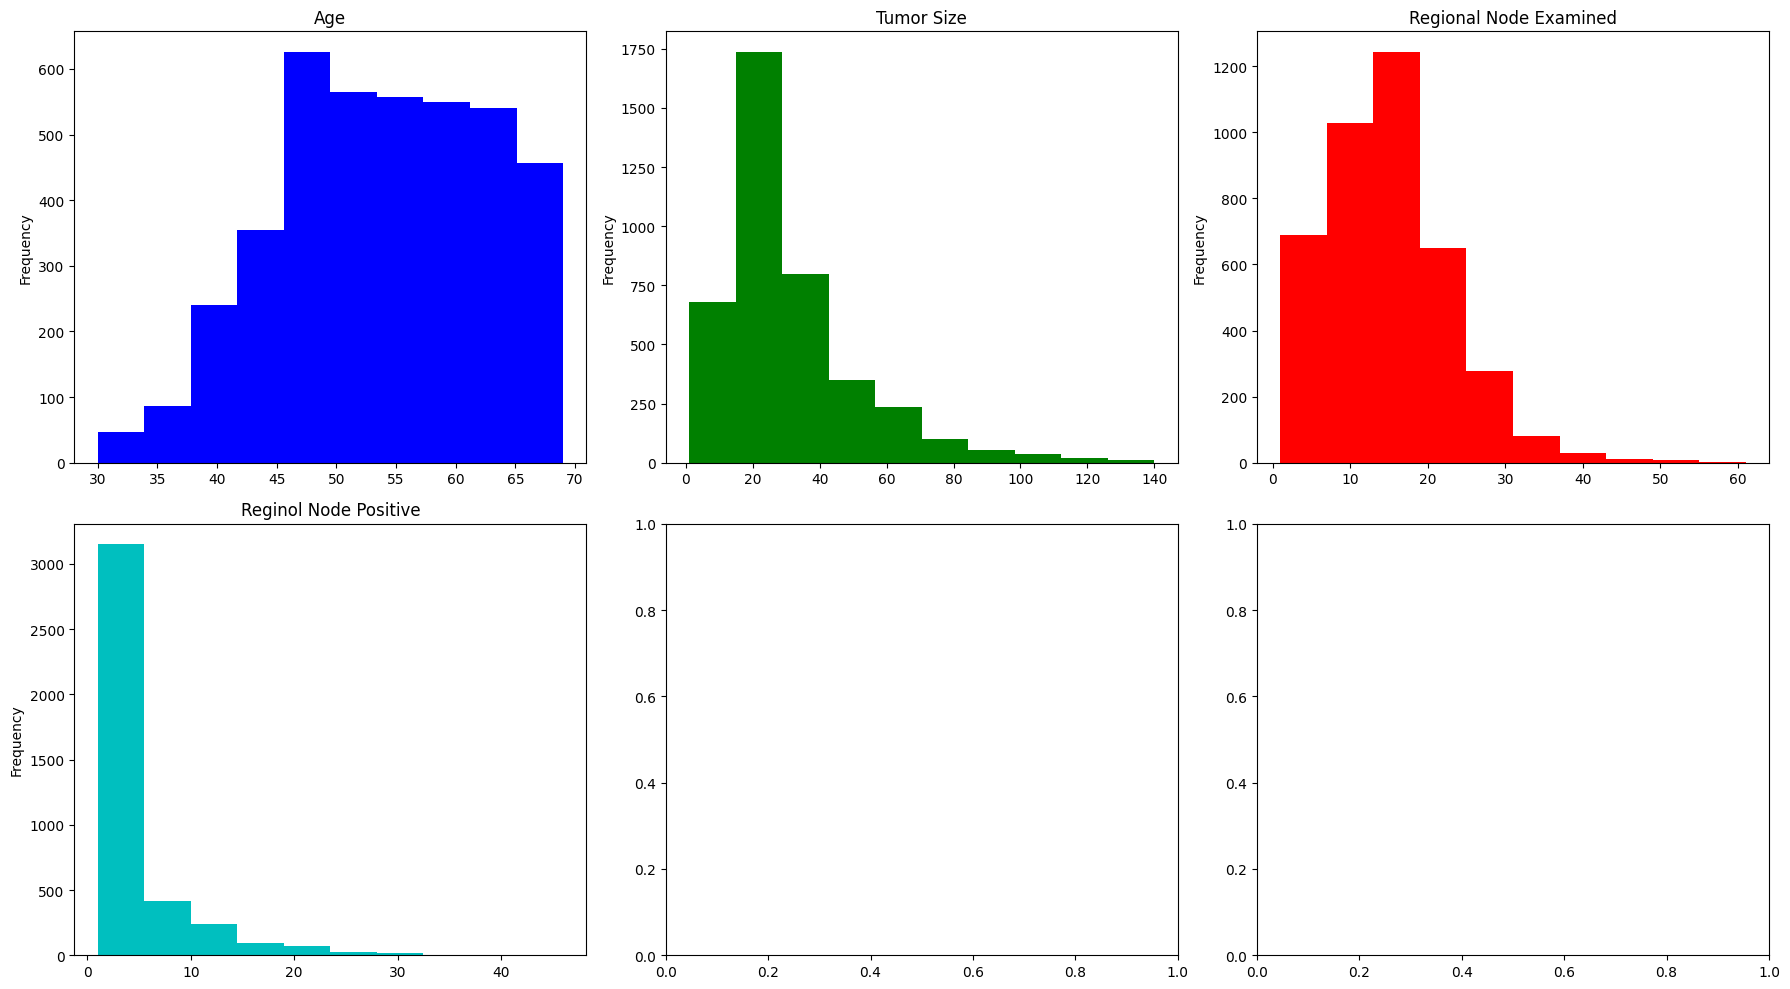

In [24]:
distribution_plots(numeric_df, ncols=3)

### Correlation

In [25]:
correlation_plot(data[numeric_fields])

NameError: name 'correlation_plot' is not defined